<a href="https://colab.research.google.com/github/nikunjsonule/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/current project/SeoulBikeData.csv', header= 0,
                        encoding= 'unicode_escape')

In [5]:
#importing data and show first 5 rows
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Columns in the datasets
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

First copy the dataset, so our original dataset remains unchanged

In [7]:
# Using this data frame for all analysis
bike_sharing_data = dataset.copy()

In [8]:
bike_sharing_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Finding  number of null and missing values

In [9]:
#Find out the data type of each column 
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
bike_sharing_data.shape

(8760, 14)

In [11]:
#Detecting missing values
bike_sharing_data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Typically, their are no null and missing values,but it's important to notice and initialized some preprocessing on the feature of dataset if required. 

In [12]:
# data description 
bike_sharing_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [13]:
bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
# Date columns to Date format conversion

bike_sharing_data['Date']= pd.to_datetime(bike_sharing_data['Date'])

In [15]:
bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
# extracting month, day of week and weekdays/weekend from date column

bike_sharing_data['Date'] = pd.to_datetime(bike_sharing_data['Date'])


bike_sharing_data['month'] = bike_sharing_data['Date'].apply(lambda x : x.month)

bike_sharing_data['dayOfWeek'] = bike_sharing_data['Date'].dt.day_name()
bike_sharing_data['weekdays_weekend']=bike_sharing_data['dayOfWeek'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,dayOfWeek,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


I've three main fetaure now, i.e 'month', 'dayOfWeek', 'weekdays_weekend'

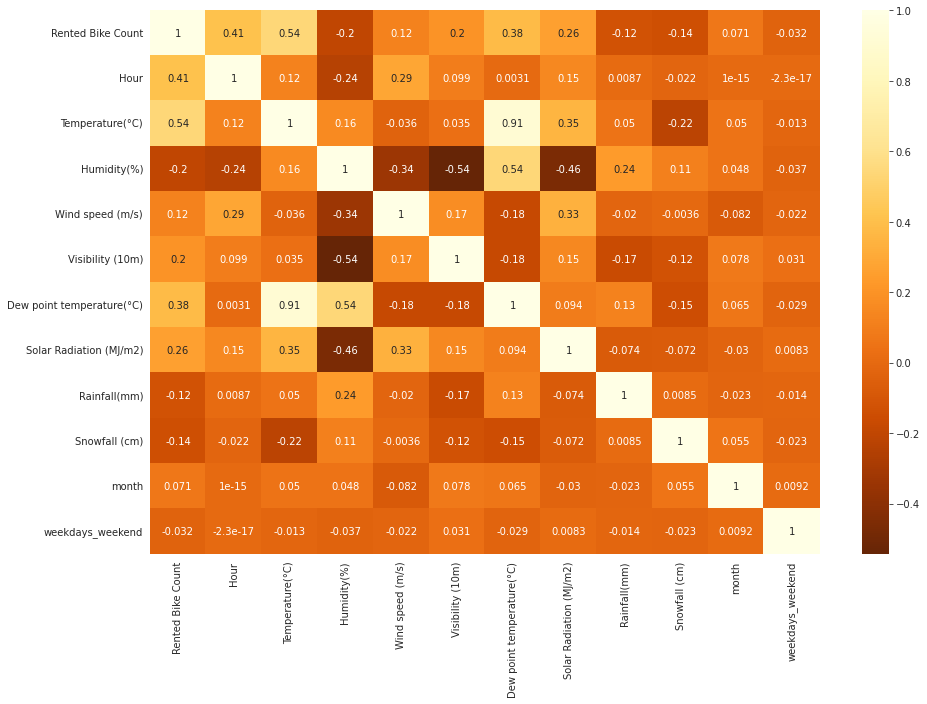

In [17]:
# Doing correlation in variables by using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(bike_sharing_data.corr(),cmap='YlOrBr_r',annot=True)

In [18]:
# Multicollinearity and calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [19]:
cal_vif(bike_sharing_data[[i for i in bike_sharing_data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.961874
1,Temperature(°C),3.236809
2,Humidity(%),6.114153
3,Wind speed (m/s),4.616621
4,Visibility (10m),5.404128
5,Solar Radiation (MJ/m2),2.272068
6,Rainfall(mm),1.081252
7,Snowfall (cm),1.125304
8,month,4.580307
9,weekdays_weekend,1.399708


From above we can observe that, 'Humidity' and 'Visibility' are having high multicollinearity between this independent variable.

Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects of individual features in your model – and that can be a problem when it comes to interpretability.

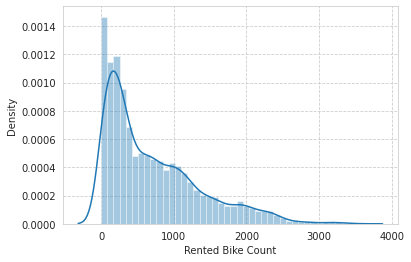

In [20]:
#visualising distribution
sns.distplot(bike_sharing_data['Rented Bike Count'])

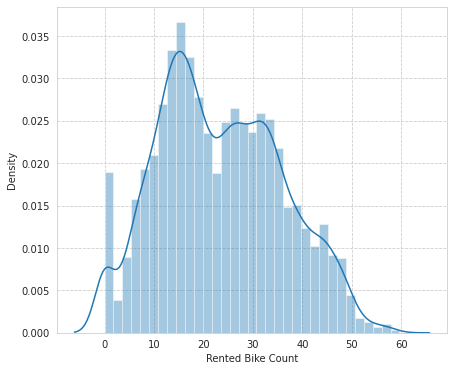

In [21]:
# square_root transformation
plt.figure(figsize=(7,6))
sns.distplot(np.sqrt(bike_sharing_data['Rented Bike Count']))

Let's look at some numeric feature

In [22]:
# Numeric Features
numeric_features= bike_sharing_data.select_dtypes(exclude='object')
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  month                      8760 non-null   int64         
 12  weekda

In [23]:
# describing numeric feature
numeric_features.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


# Univariate Analysis for numeric features

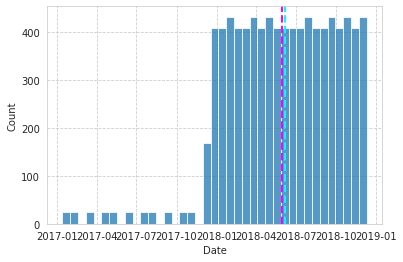

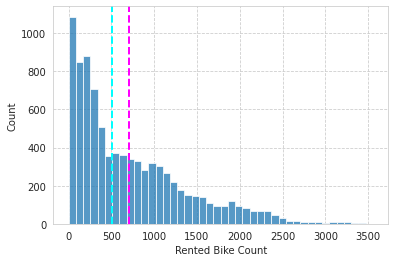

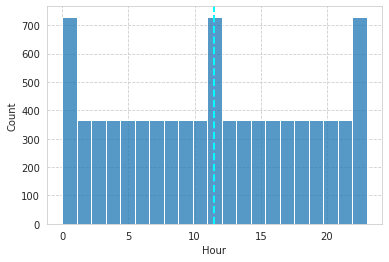

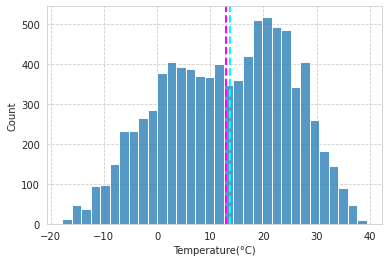

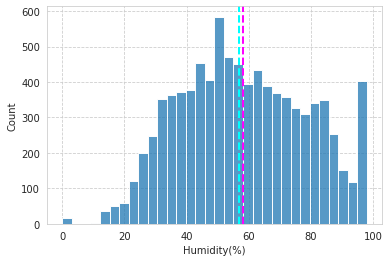

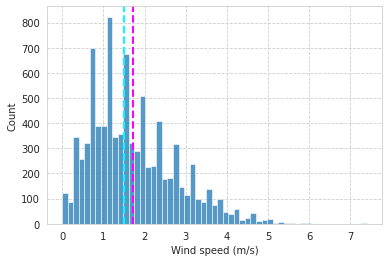

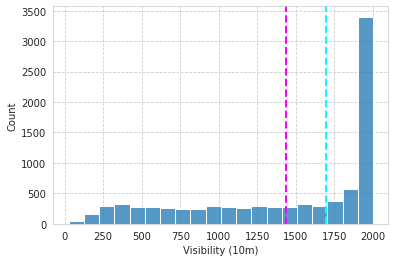

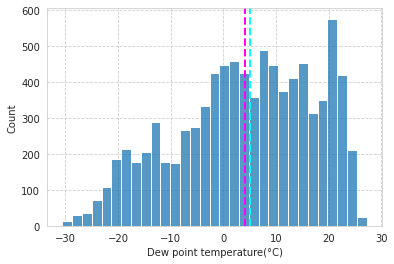

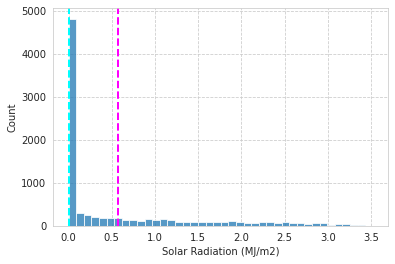

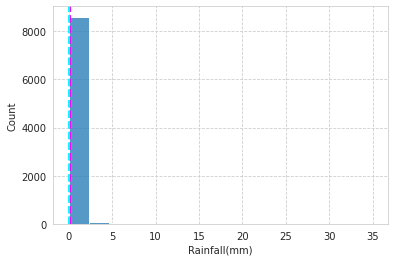

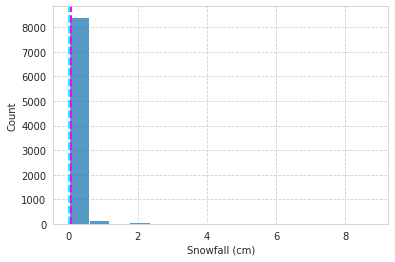

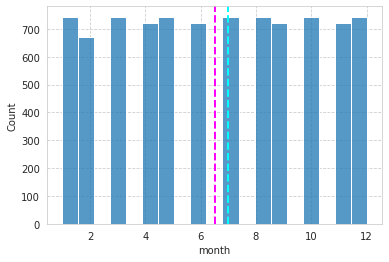

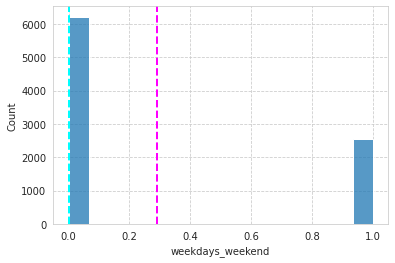

In [24]:
#plotting histogram for numeric feature
for column in numeric_features[:]:
  sns.histplot(bike_sharing_data[column])
  plt.axvline(bike_sharing_data[column].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_sharing_data[column].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

# Bivariate Analysis

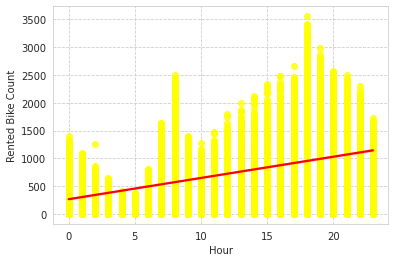

In [25]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

sns.regplot(data=bike_sharing_data, x='Hour', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})


From above regression plots I can't see any pattern. Every time its varying in an hour for rented bike count.

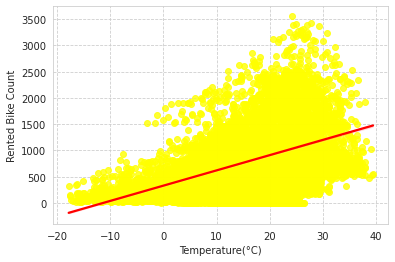

In [26]:
sns.regplot(data=bike_sharing_data, x='Temperature(°C)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

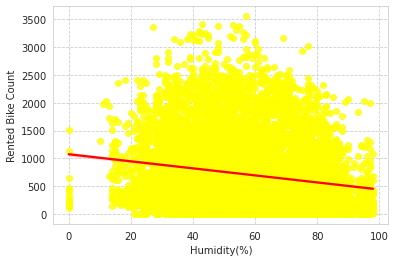

In [27]:
sns.regplot(data=bike_sharing_data, x='Humidity(%)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

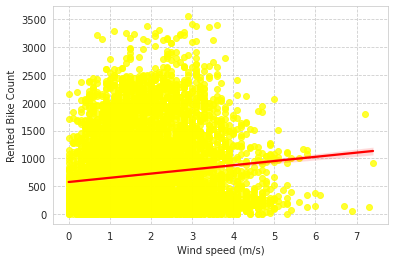

In [28]:
sns.regplot(data=bike_sharing_data, x='Wind speed (m/s)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

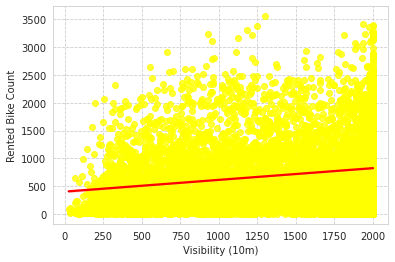

In [29]:
sns.regplot(data=bike_sharing_data, x='Visibility (10m)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

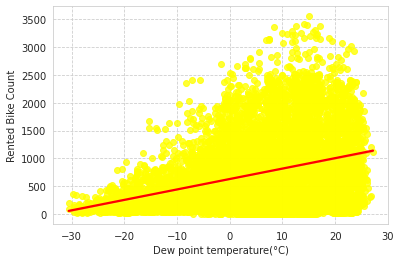

In [30]:
sns.regplot(data=bike_sharing_data, x='Dew point temperature(°C)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

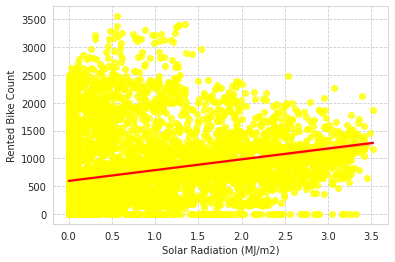

In [31]:
sns.regplot(data=bike_sharing_data, x='Solar Radiation (MJ/m2)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

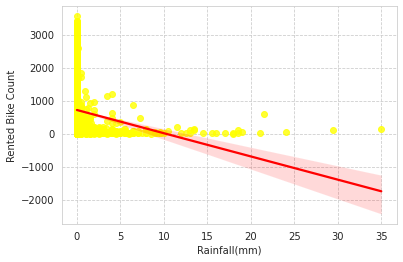

In [32]:
sns.regplot(data=bike_sharing_data, x='Rainfall(mm)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

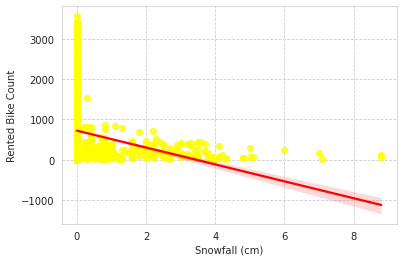

In [33]:
sns.regplot(data=bike_sharing_data, x='Snowfall (cm)', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

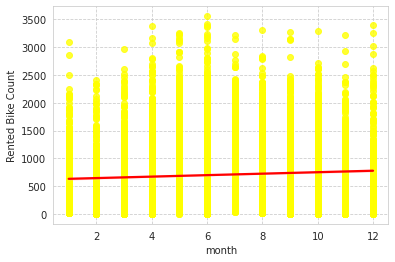

In [34]:
sns.regplot(data=bike_sharing_data, x='month', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

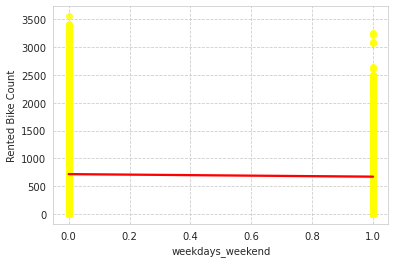

In [35]:
sns.regplot(data=bike_sharing_data, x='weekdays_weekend', y='Rented Bike Count', color='yellow',line_kws= {'color':'red'})

In [36]:
bike_sharing_data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,dayOfWeek,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [37]:
#Extracting categorical features
categorical_features= bike_sharing_data.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day,dayOfWeek
0,Winter,No Holiday,Yes,Thursday
1,Winter,No Holiday,Yes,Thursday
2,Winter,No Holiday,Yes,Thursday
3,Winter,No Holiday,Yes,Thursday
4,Winter,No Holiday,Yes,Thursday
...,...,...,...,...
8755,Autumn,No Holiday,Yes,Friday
8756,Autumn,No Holiday,Yes,Friday
8757,Autumn,No Holiday,Yes,Friday
8758,Autumn,No Holiday,Yes,Friday


Above are the categorical features of dataset.

Now, let's visualize and get analysis based on categorical features.

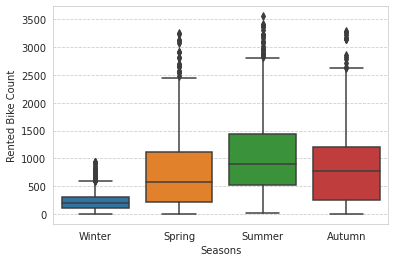

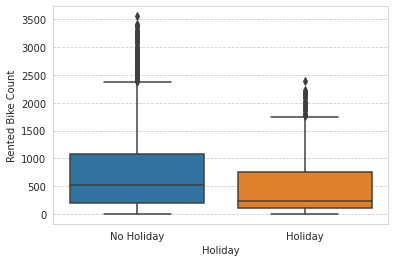

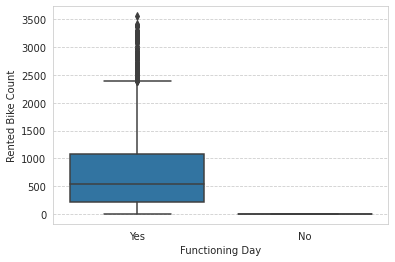

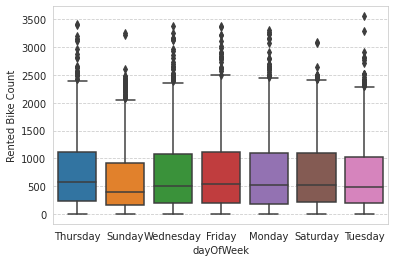

In [38]:
#ploting Box plot to visualize and get some insights
for col in categorical_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=bike_sharing_data[col],y=bike_sharing_data["Rented Bike Count"])
  plt.show()

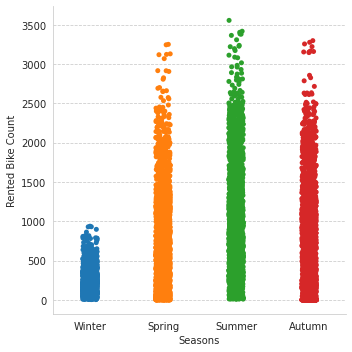

In [39]:
#Insights from cat plot
sns.catplot(x='Seasons',y='Rented Bike Count',data=bike_sharing_data)

In [40]:
# functioning day count
bike_sharing_data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

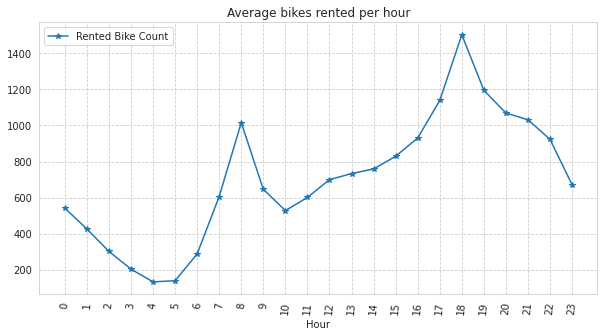

In [49]:
#ploting line graph
avg_rent_hour = bike_sharing_data.groupby('Hour')['Rented Bike Count'].mean()                          # calculating mean of rented bike Vs hour

# plotting average rent per hour
plt.figure(figsize=(10,5))
avg_plot=avg_rent_hour.plot(legend=True,marker= '*',title="Average bikes rented per hour")
avg_plot.set_xticks(range(len(avg_rent_hrs)));
avg_plot.set_xticklabels(avg_rent_hour.index.tolist(), rotation=85);

In [50]:
# dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,dayOfWeek_Wednesday
0,0,0,1,1,1,0,0,0,1,0,0
1,0,0,1,1,1,0,0,0,1,0,0
2,0,0,1,1,1,0,0,0,1,0,0
3,0,0,1,1,1,0,0,0,1,0,0
4,0,0,1,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8755,0,0,0,1,1,0,0,0,0,0,0
8756,0,0,0,1,1,0,0,0,0,0,0
8757,0,0,0,1,1,0,0,0,0,0,0
8758,0,0,0,1,1,0,0,0,0,0,0


In [52]:
#concating numeric columns and dummy categorical columns and creating final dataframe
dataframe_final= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
dataframe_final.head(2)

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
0,0,0,1,1,1,0,0,0,1,0,...,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0
1,0,0,1,1,1,0,0,0,1,0,...,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0


In [54]:
#descriptive statistics of a dataset
dataframe_final.describe()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,dayOfWeek_Monday,dayOfWeek_Saturday,dayOfWeek_Sunday,dayOfWeek_Thursday,dayOfWeek_Tuesday,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,weekdays_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,0.252055,0.252055,0.246575,0.950685,0.966324,0.136986,0.142466,0.147945,0.142466,0.145205,...,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,0.434217,0.434217,0.431042,0.216537,0.180404,0.343853,0.349547,0.355066,0.349547,0.352328,...,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000
